# Homework 3: Reproducibility in Climate Studies

### Question 5 [10 points]

Reproduce one of the images in Figure 2. If you feel adventurous, you can make more than one!

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from pathlib import Path

# Small style adjustments for more readable plots
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 14

/tmp/ipykernel_314/187724789.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [3]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec

import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

import warnings
warnings.simplefilter("ignore")  # filter some warning messages

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

Subset all the data to just the West Coast region

In [4]:
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")
ds

<xarray.Dataset>
Dimensions:           (time: 6443, lat: 251, lon: 234)
Coordinates:
  * lat               (lat) float32 33.0 33.06 33.12 33.18 ... 47.88 47.94 48.0
  * lon               (lon) float32 -132.0 -131.9 -131.9 ... -118.1 -118.0
  * time              (time) datetime64[ns] 2002-06-01T09:00:00 ... 2020-01-2...
Data variables:
    analysed_sst      (time, lat, lon) float32 ...
    analysis_error    (time, lat, lon) float32 ...
    mask              (time, lat, lon) float32 ...
    sea_ice_fraction  (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:                CF-1.7
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    ...                         ...
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    time_coverage_end:          20200116T210000Z
    time_coverage_start:        20200115T210000Z
    title:                      Daily MUR SST, Final product
    uuid:                       27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:      -180.0

## (a)

In [5]:
# slice the years from 2002-2016.7, and find the maximum temp for each date
ds_sliced = ds.sel(time = slice("2002", "2016-07"))
max_temp = ds_sliced.groupby(ds_sliced.time.dt.dayofyear).max()

# mean SST from 2002-2012 climatology
ds_02_12 = ds.sel(time = slice("2002", "2012"))
avg_temp = ds_sliced.groupby(ds_sliced.time.dt.dayofyear).mean()

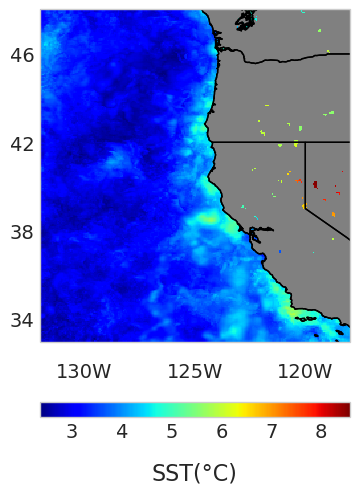

In [71]:
# Calculate the anomalies
max_SST_anomaly = max_temp['analysed_sst'] - avg_temp['analysed_sst']
max_temp['max_SST_anomaly'] = max_SST_anomaly

# find the max SST over dayofyear and store it as a new variable
max_temp['max_SST_anomaly_overtime'] = max_temp['max_SST_anomaly'].max(dim='dayofyear')

## Plot on a map
ax = plt.subplot(projection=crs)
q5_map = max_temp['max_SST_anomaly_overtime'].plot(cmap='jet', x='lon', y='lat', ax=ax, 
                                                   transform=crs, add_colorbar=False)

# plot the U.S. land
ax.coastlines("10m", color="k")
ax.add_feature(cfeature.LAND, color="grey")
ax.add_feature(cfeature.STATES.with_scale("10m"))

# Add x, y labels and format ticks
ax.set_yticks(range(34, 47, 4))
ax.set_ylabel('')
ax.tick_params(axis='x', which='major', pad=15)
ax.set_xticks([-130, -125, -120])
ax.set_xticklabels(['130W', '125W', '120W'])

ax.set_xlabel('')

# add colorbar
cbar = plt.colorbar(q5_map, location='bottom', shrink=0.5, pad=0.13)
cbar.set_label('SST(°C)', size=16, labelpad=15)
cbar.set_ticks([3, 4, 5, 6, 7, 8])
plt.show()

## (b)

In [7]:
# slice the years from 2002-2016.7
ds_sliced = ds.sel(time = slice("2002", "2016-07"))['analysed_sst']
max_temp_b = ds_sliced.groupby(ds_sliced.time.dt.dayofyear)

# mean SST from 2002-2012 climatology
ds_02_12 = ds.sel(time = slice("2002", "2012"))['analysed_sst']
avg_temp_b = ds_sliced.groupby(ds_sliced.time.dt.dayofyear).mean()

# Calculate maximum anomaly month
max_SST_anomaly_b = max_temp_b - avg_temp_b
monthly_anomaly = max_SST_anomaly_b.idxmax(dim='time').dt.month

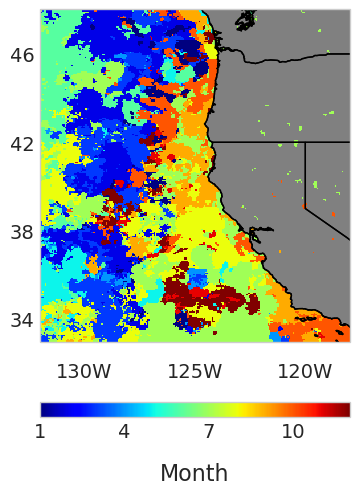

In [70]:
## Plot on a map
ax = plt.subplot(projection=crs)
q5b_map = monthly_anomaly.plot(cmap='jet', x='lon', y='lat', ax=ax, 
                               transform=crs, add_colorbar=False)

# plot the U.S. land
ax.coastlines("10m", color="k")
ax.add_feature(cfeature.LAND, color="grey")
ax.add_feature(cfeature.STATES.with_scale("10m"))

# Add x, y labels and format ticks
ax.set_yticks(range(34, 47, 4))
ax.set_ylabel('')
ax.set_xticks([-130, -125, -120])
ax.set_xticklabels(['130W', '125W', '120W'])
ax.set_xlabel('')
ax.tick_params(axis='x', which='major', pad=15)

# add colorbar
cbar = plt.colorbar(q5b_map, location='bottom', shrink=0.5, pad=0.13)
cbar.set_label('Month', size=16, labelpad=15)
cbar.set_ticks(range(1, 11, 3))
plt.show()